## **Part 5:**
In part 2, we accomplished the following:
- Impute missing values
- Keep valid range

In part 3, accomplished the following:
- Statitical tests for continuous variables
- Visualisations for continous variables

In part 4, accomplished the following:
- Statitical tests for ordinal variables
- Visualisations for ordinal variables

**In part 5, we would do the following:**
- Statitical tests for binary variables
- Visualisations for binary variables


In [331]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import levene, ttest_ind, f_oneway, kruskal, shapiro, kstest
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [332]:
import pandas as pd

# Read the data
df = pd.read_csv('/content/filtered_data.csv')
df_schema = pd.read_csv('/content/schema.csv')
df_schema.set_index('variable_name', inplace=True)
df_schema
df.shape

(18883, 70)

### **Data Modification**

Most frequently occuring value and the count

In [333]:
# most frequently occuring value and the count
most_frequent_values = {}
for column in df.columns:
    most_common = df[column].value_counts().idxmax()
    count = df[column].value_counts().max()
    most_frequent_values[column] = {'value': most_common, 'count': count}

# DataFrame from the dictionary
result_df = pd.DataFrame(most_frequent_values).T

print(result_df)

                                           value   count
Hospital Mortality                             0   15866
Age                                           77     504
Gender                                         M   11457
Uncomplicated Hypertension                     0   10123
Complicated Hypertension                       0   17418
Uncomplicated Diabetes                         0   14980
Complicated Diabetes                           0   17924
Malignancy                                     0   16871
Hematologic Disease                            0   16070
Metastasis                                     0   18055
Peripheral Vascular Disease                    0   17244
Hypothyroidism                                 0   17307
Chronic Heart Failure                          0   14348
Stroke                                         0   17825
Liver Disease                                  0   17085
SAPS II                                       34     692
SOFA                           

#### **Find Missing values**

Number of Missing values by Columns

In [334]:
# missing values column-wise
na_count = df.isnull().sum() # total count
na_pct = (na_count/len(df))*100 # percentage

na_df = pd.DataFrame({'Count': na_count.values,
                      'Percentage (%)': na_pct}).reset_index().rename(columns = {'index': 'Feature'})

na_df.sort_values(by='Percentage (%)', ascending=False)

,Feature,Count,Percentage (%)
49,Mean Lactate,5101,27.013716
48,Min Lactate,5101,27.013716
47,Max Lactate,5101,27.013716
50,Max pH,1173,6.211937
51,Min pH,1173,6.211937
52,Mean pH,1173,6.211937
44,Max Temperature,687,3.638193
45,Min Temperature,687,3.638193
46,Mean Temperature,687,3.638193
68,Ventilation Duration (h),497,2.631997


Number of missing values by rows

In [335]:
temp_df = df.copy()
# Calculate missing values by row
missing_values_by_row = df.isnull().sum(axis=1)

# Add the missing values count to the original DataFrame
temp_df["MissingValuesCount"] = missing_values_by_row

total_rows = len(temp_df)
temp_df["MissingValuesPercentage"] = (temp_df["MissingValuesCount"] / total_rows) * 100

# Sort the DataFrame by the "MissingValuesCount" column in descending order
df_sorted = temp_df.sort_values(by="MissingValuesPercentage", ascending=False)

# Print the sorted DataFrame
print(df_sorted[['MissingValuesCount','MissingValuesPercentage']].head(100))

       MissingValuesCount  MissingValuesPercentage
6766                   36                 0.190648
11565                  36                 0.190648
960                    36                 0.190648
6480                   36                 0.190648
8888                   27                 0.142986
8750                   25                 0.132394
1794                   24                 0.127098
4749                   24                 0.127098
4900                   24                 0.127098
13876                  24                 0.127098
13534                  24                 0.127098
10804                  24                 0.127098
4171                   24                 0.127098
1682                   22                 0.116507
4219                   22                 0.116507
1509                   22                 0.116507
8097                   22                 0.116507
11525                  22                 0.116507
15573                  22      

#### **Remove Missing Values**
- In the codes below, we are checking the missing values per group of variables.
- We have the rows counts towards the right with number of missing values towardsleft(1-5) and their respective percentages.

In [336]:
before_clear_mv = df.shape
print(f'Before clean missing values, the dataset has {before_clear_mv[0]} rows and {before_clear_mv[1]} variables')

Before clean missing values, the dataset has 18883 rows and 70 variables


In [337]:
# drop the columns RRT and Ventilation Duration (h) in df
df_orig = df.copy()
df = df.drop(['RRT', 'Ventilation Duration (h)'], axis=1)

In [338]:
def calculate_missing_percentages(df):
    df_copy = df.copy()  # Create a copy of the DataFrame
    missing_percentages = df_copy.isna().sum(axis=1) / len(df.columns) * 100
    missing_percentages = missing_percentages.round(2)

    # Create a new column to store the percentage of missing values
    df_copy['missing_percentage'] = missing_percentages

    # Group the DataFrame by the 'missing_percentage' column and count the number of observations in each group
    counts = df_copy.groupby('missing_percentage').size().reset_index(name='count')

    # Sort the table by percentage from highest to lowest
    counts = counts.sort_values(by='missing_percentage', ascending=False)

    # Print the table
    print(counts)

In [339]:
dem_f = df_schema[df_schema['category'] == 'Demographic'].index
medical_f = df_schema[df_schema['category'] == 'Medical history'].index
severe_f = df_schema[df_schema['category'] == 'Disease severity'].index
diag_f = df_schema[df_schema['category'] == 'Diagnosis'].index
vital_f = df_schema[df_schema['category'] == 'Vital signs'].index
lab_f = df_schema[df_schema['category'] == 'Laboratory results'].index

dem_df = df[dem_f]
medical_df = df[medical_f]
severe_df = df[severe_f]
diag_df = df[diag_f]
vital_df = df[vital_f]
lab_df = df[lab_f]


In [340]:
print('Demographic')
print(calculate_missing_percentages(dem_df))
print('-----------------------------')
print()
print('Medical history')
print(calculate_missing_percentages(medical_df))
print('-----------------------------')
print()
print('Disease severity')
print(calculate_missing_percentages(severe_df))
print('-----------------------------')
print()
print('Diagnosis')
print(calculate_missing_percentages(diag_df))
print('-----------------------------')
print()
print('Vital signs')
print(calculate_missing_percentages(vital_df))
print('-----------------------------')
print()
print('Laboratory results')
print(calculate_missing_percentages(lab_df))

Demographic
   missing_percentage  count
0                 0.0  18883
None
-----------------------------

Medical history
   missing_percentage  count
0                 0.0  18883
None
-----------------------------

Disease severity
   missing_percentage  count
0                 0.0  18883
None
-----------------------------

Diagnosis
   missing_percentage  count
0                 0.0  18883
None
-----------------------------

Vital signs
   missing_percentage  count
4               100.0     41
3                60.0      1
2                40.0     18
1                20.0    647
0                 0.0  18176
None
-----------------------------

Laboratory results
   missing_percentage  count
7              100.00     50
6               85.71      9
5               71.43      6
4               57.14     15
3               42.86     28
2               28.57    968
1               14.29   4345
0                0.00  13462
None


- Based on the above analysis, we removed all the rows that had missing values for vital signs and Laboratory features.

In [341]:
# removing missing values from Vital features
df.dropna(subset=['Max Heart Rate', 'Min Heart Rate', 'Mean Heart Rate',
                  'Max MAP', 'Min MAP', 'Mean MAP',
                  'Max Systolic Pressure', 'Min Systolic Pressure', 'Mean Systolic Pressure',
                  'Max Diastolic Pressure', 'Min Diastolic Pressure', 'Mean Diastolic Pressure',
                  'Max Temperature', 'Min Temperature', 'Mean Temperature'],
          inplace=True)

In [342]:
df.shape

(18176, 68)

In [343]:
# removing missing values from laboratory features
df.dropna(subset=['Max Lactate', 'Min Lactate', 'Mean Lactate',
                    'Max pH', 'Min pH', 'Mean pH',
                    'Max Glucose', 'Min Glucose', 'Mean Glucose',
                    'Max WBC', 'Min WBC', 'Mean WBC',
                    'Max BUN', 'Min BUN', 'Mean BUN',
                    'Max Creatinine', 'Min Creatinine', 'Mean Creatinine',
                    'Max Hemoglobin', 'Min Hemoglobin', 'Mean Hemoglobin'],
          inplace=True)

In [344]:
after_clean_missing_values = df.shape

#### After Clear up missing values

In [345]:
print(f'Before clean missing values, the dataset has {before_clear_mv[0]} rows and {before_clear_mv[1]} variables')
print(f'After clean missing values, the dataset has {after_clean_missing_values[0]} rows and {after_clean_missing_values[1]} variables')

Before clean missing values, the dataset has 18883 rows and 70 variables
After clean missing values, the dataset has 12799 rows and 68 variables


#### **Valid Range**

Make sure all variables are within valid range

In [346]:
df = df.loc[
    ((df['Max Heart Rate'] >= 0) & (df['Max Heart Rate'] <= 350))
    & ((df['Min Heart Rate'] >= 0) & (df['Max Heart Rate'] <= 350))
    & ((df['Mean Heart Rate'] >= 0) & (df['Mean Heart Rate'] <= 350))
    & ((df['Max MAP']  >= 14) & (df['Max MAP'] <= 330))
    & ((df['Min MAP']  >= 14) & (df['Min MAP'] <= 330))
    & ((df['Mean MAP']  >= 14) & (df['Mean MAP'] <= 330))
    & ((df['Min Systolic Pressure'] >= 0) & (df['Min Systolic Pressure'] <= 375))
    & ((df['Max Systolic Pressure'] >= 0) & (df['Max Systolic Pressure'] <= 375))
    & ((df['Mean Systolic Pressure'] >= 0) & (df['Mean Systolic Pressure'] <= 375))
    & ((df['Min Diastolic Pressure'] >= 0) & (df['Min Diastolic Pressure'] <= 375))
    & ((df['Max Diastolic Pressure'] >= 0) & (df['Max Diastolic Pressure'] <= 375))
    & ((df['Mean Diastolic Pressure'] >= 0) & (df['Mean Diastolic Pressure'] <= 375))
    & ((df['Min Temperature'] >= 26)& (df['Min Temperature'] <= 45))
    & ((df['Max Temperature'] >= 26)& (df['Max Temperature'] <= 45))
    & ((df['Mean Temperature'] >= 26)& (df['Mean Temperature'] <= 45))
    & ((df['Min pH']  >= 0)& (df['Min pH'] <= 14))
    & ((df['Max pH']  >= 0)& (df['Max pH'] <= 14))
    & ((df['Mean pH']  >= 0)& (df['Mean pH'] <= 14))
    & ((df['Min Lactate']  >= 0.4)& (df['Min Lactate'] <= 30))
    & ((df['Max Lactate']  >= 0.4)& (df['Max Lactate'] <= 30))
    & ((df['Mean Lactate']  >= 0.4)& (df['Mean Lactate'] <= 30))
    & ((df['Min Glucose'] >= 33)& (df['Min Glucose'] <= 2000))
    & ((df['Max Glucose'] >= 33)& (df['Max Glucose'] <= 2000))
    & ((df['Mean Glucose'] >= 33)& (df['Mean Glucose'] <= 2000))
    & ((df['Min WBC'] >= 0)& (df['Min WBC'] <= 1000))
    & ((df['Max WBC'] >= 0)& (df['Max WBC'] <= 1000))
    & ((df['Mean WBC'] >= 0)& (df['Mean WBC'] <= 1000))
    & ((df['Min BUN'] >= 0)& (df['Min BUN'] <= 250))
    & ((df['Max BUN'] >= 0)& (df['Max BUN'] <= 250))
    & ((df['Mean BUN'] >= 0)& (df['Mean BUN'] <= 250))
    & ((df['Min Creatinine'] >= 0.1)& (df['Min Creatinine'] <= 60))
    & ((df['Max Creatinine'] >= 0.1)& (df['Max Creatinine'] <= 60))
    & ((df['Mean Creatinine'] >= 0.1)& (df['Mean Creatinine'] <= 60))
    & ((df['Min Hemoglobin'] >= 0) & (df['Min Hemoglobin'] <= 25))
    & ((df['Max Hemoglobin'] >= 0) & (df['Max Hemoglobin'] <= 25))
    & ((df['Mean Hemoglobin'] >= 0) & (df['Mean Hemoglobin'] <= 25))
]

we removed around ~300 rows after appying valid ranges

In [347]:
print(df['Hospital Mortality'].value_counts())

0    10331
1     2158
Name: Hospital Mortality, dtype: int64


In [348]:
df.shape

(12489, 68)

### **Create Subsets**

In [349]:
binary = df_schema[((df_schema['variable_type'] == 'binary') | (df_schema.index == 'Hospital Mortality')) & (df_schema.index != 'RRT')].index
ordinal = df_schema[((df_schema['variable_type'] == 'ordinal') | (df_schema.index == 'Hospital Mortality'))].index
cont_all = df_schema[((df_schema['variable_type'] == 'continuous') | (df_schema.index == 'Hospital Mortality')) & (df_schema['category'] != 'Treatment')].index

print("Length of Binary Variables:", len(binary))
print("Length of Ordinal Variables:", len(ordinal))
print("Length of Continuous Variables:", len(cont_all))


Length of Binary Variables: 28
Length of Ordinal Variables: 4
Length of Continuous Variables: 38


In [350]:
cont_all_df = df[cont_all]
binary_df = df[binary]
ordinal_df = df[ordinal]

.**Quantitative variables can be further classified into:**

- ***Continuous variables:*** Also known as ratio variables. These are units of
measurement that can be represented in quantities less than 1. For instance, 0.8 km.

- ***Discrete or integer variables:*** Units that cannot be divided, such as 1 car or 1 tree.

- **Interval:**Variables that do not have a true zero (or it's arbitrary), or that zero value of that variable doesn't make sense. For example - IQ. Zero IQ doesn't mean anything. At the same time, person with IQ of 100 does not mean being twice as sharp to person with IQ of 50.
These variables have equal distance between values.

- **Ratio/Count:**Variables where zero value makes sense. For example - number of apples, 0 apples means nothing, while having 10 apples mean having twice as many as having 5 apples.
These variables have an intrinsic order with equal distance between values, howsoever small.

**Categorical variables are divided into the following variables:**

- ***Binary:*** Data that has one of two outcomes, such as yes/no or pass/fail.

- ***Nominal***: Used to describe data with no intrinsic order, such as brands, families, species.

- **Ordinal**: *italicized text* For ordered data types with observable scales of hierarchy, such as user ratings.

**Informal Rules:**

- Ordinal: Nominal + Order
- Interval: Order + Equal distance between values
- Ratio: Interval + True Zero

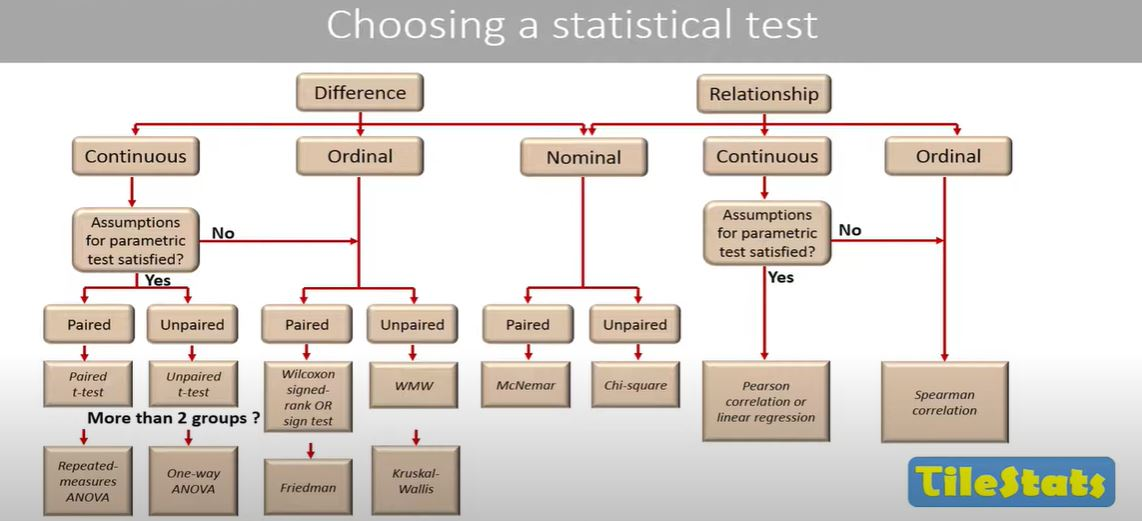

### **Binary Variables: Whether Parametric tests or Non-Parametric tests?**

**Chi- Square Test: Types**

***Chi-Square Goodness of Fit Test(one variable)***
- Purpose: Decide if one variable is likely to come from a given distribution or not
- Example: Decide if bags of candy have the same number of pieces of each flavor or not
- Ho: proportion of flavors of candy are the same

- Ha: proportions of flavors are not the same

***Chi-Square Test of Independence(two variable)***
- Purpose: Decide if two variables might be related or not
- Example: Decide if movie goers' decision to buy snacks is related to the type of movie they plan to watch
- Ho: proportion of people who buy snacks is independent of the movie type
- Ha: proportion of people who buy snacks is different for different types of movies


***With respect to the categorical variables, we used the Chi-Square Test of Independence. Note that all assumptions listed below are met.***



**Assumptions:**

- The observations in the independence table must be independent.  

- The variables are categorical.  

- Random sampling is assumed.  

- Each cell in the contingency is >5.  



**H0 = The presence of the medical condition and the survival outcome of the patients are independent**

**Ha = There is a significant association between the presence of the medical condition and the survival outcome of the patients.**  

In [351]:
# Create an empty dictionary to store results assuming not normal distribution
result_dict = {'Variable': [], 'Data_Type': [], 'Type_of_Test': [], 'P-value': []}

# Create an empty dictionary to store results assuming normal distribution
# result_dict_n = {'Variable': [], 'Data_Type': [], 'Type_of_Test': [], 'P-value': []}

In [352]:
for column in binary_df.columns[1:]:
    contingency_table = pd.crosstab(df['Hospital Mortality'], df[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print()
    print(contingency_table)
    print()
    print(f"Chi-square test between Hospital Mortality and {column}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print("--------------------------------------------------------")

    # Append results to the dictionary
    result_dict['Variable'].append(column)
    result_dict['Data_Type'].append('Categorical')
    result_dict['Type_of_Test'].append('Chi-Square')
    result_dict['P-value'].append(p)

    # result_dict_n['Variable'].append(column)
    # result_dict_n['Data_Type'].append('Categorical')
    # result_dict_n['Type_of_Test'].append('Chi-Square')
    # result_dict_n['P-value'].append(p)



Gender                 F     M
Hospital Mortality            
0                   3938  6393
1                    953  1205

Chi-square test between Hospital Mortality and Gender:
Chi2 value: 27.10758978619394
P-value: 1.9244091683381194e-07
--------------------------------------------------------

Uncomplicated Hypertension     0     1
Hospital Mortality                    
0                           5635  4696
1                           1366   792

Chi-square test between Hospital Mortality and Uncomplicated Hypertension:
Chi2 value: 55.189196979179414
P-value: 1.0946874261933157e-13
--------------------------------------------------------

Complicated Hypertension     0    1
Hospital Mortality                 
0                         9486  845
1                         1941  217

Chi-square test between Hospital Mortality and Complicated Hypertension:
Chi2 value: 7.838345176804054
P-value: 0.005114940941223975
--------------------------------------------------------

Uncomplica

**Observation:**
- For all categorical variables, except uncomplicated diabetes, complicated diabetes, peripheral vascular disease and hypothyroidism, the resulting p-value is < 0.05. This implies that, for the mentioned variables, we failed to reject the null hypothesis and that there is no significant association between the presence of these medical conditions and the survival outcome of the patients.
- For the rest of the variables with p-value > 0.05, we can assume that there is significant association.

### **Visualization**

#### **Bar plots of binary variables**

<Figure size 800x600 with 0 Axes>

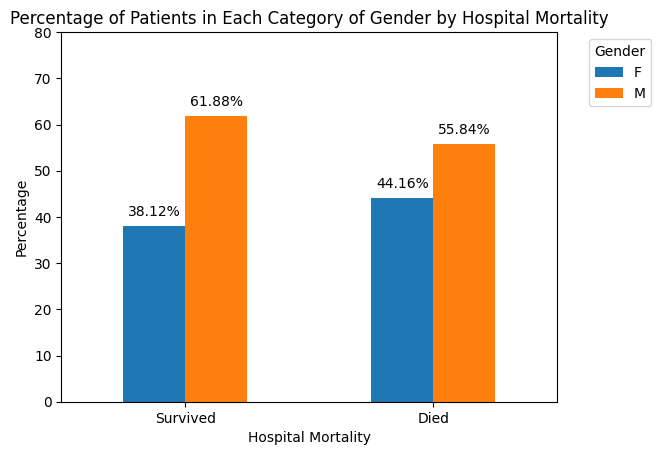

<Figure size 800x600 with 0 Axes>

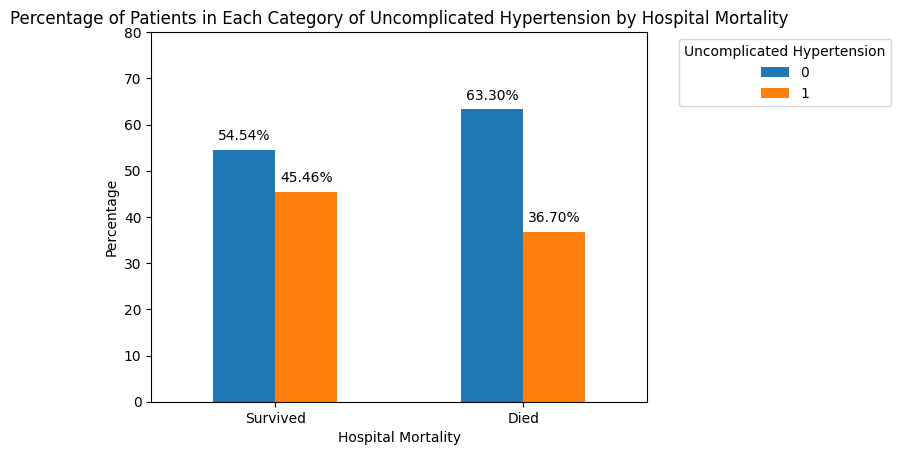

<Figure size 800x600 with 0 Axes>

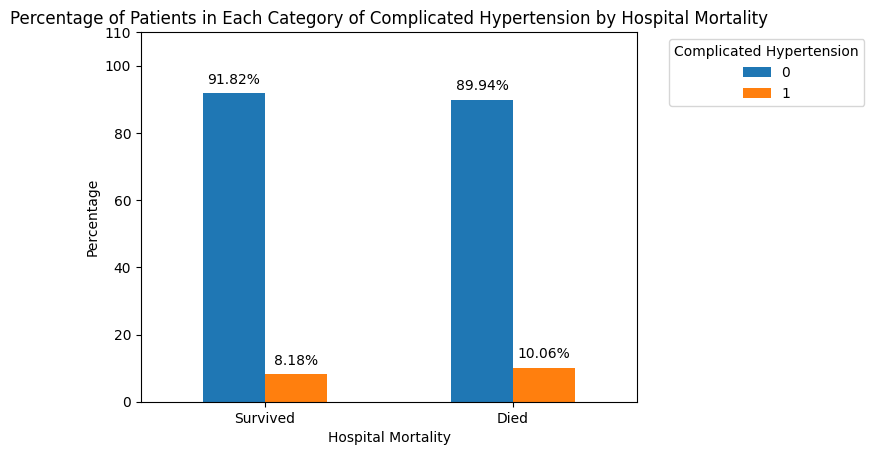

<Figure size 800x600 with 0 Axes>

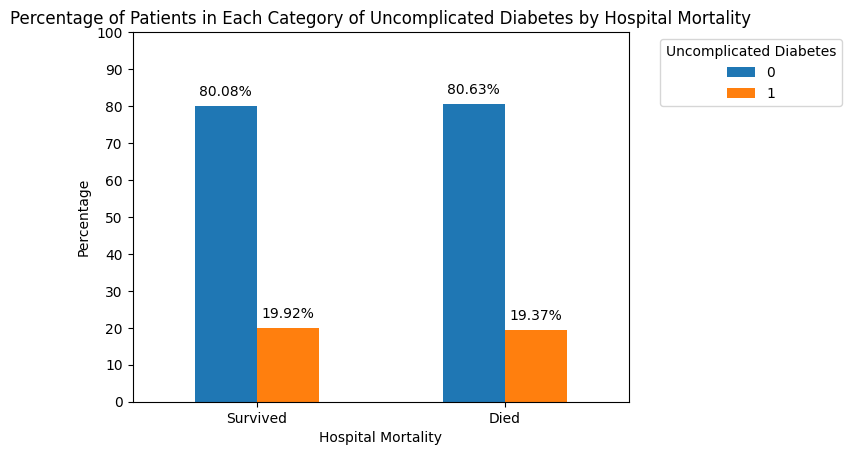

<Figure size 800x600 with 0 Axes>

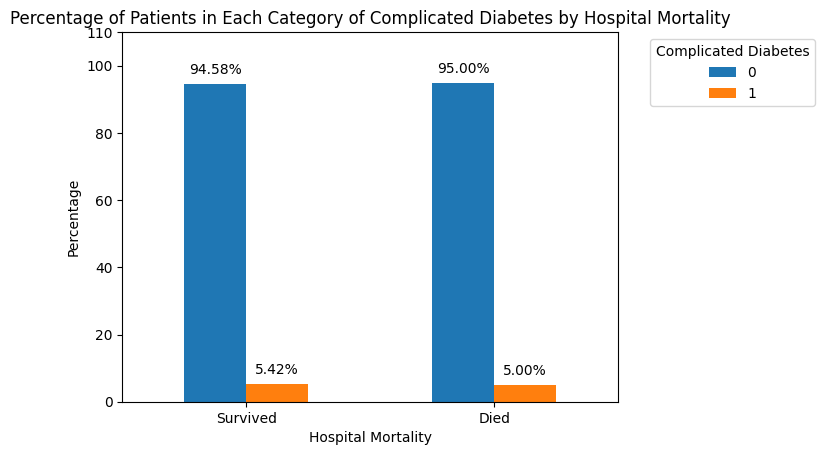

<Figure size 800x600 with 0 Axes>

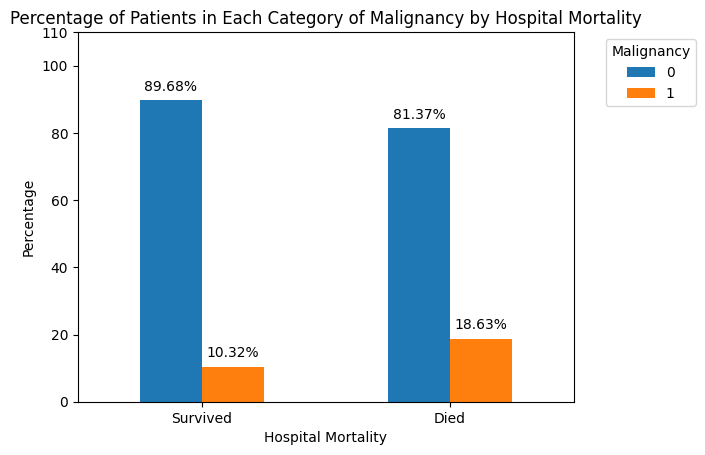

<Figure size 800x600 with 0 Axes>

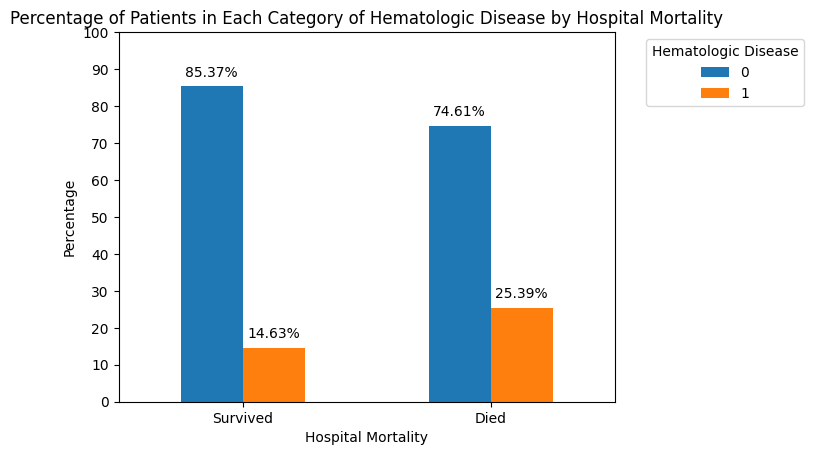

<Figure size 800x600 with 0 Axes>

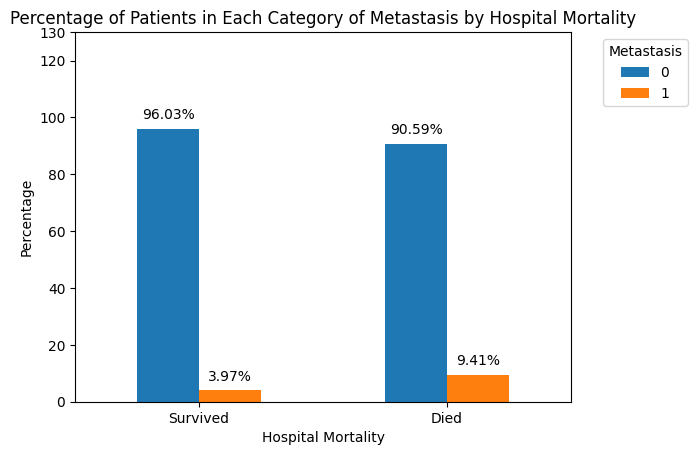

<Figure size 800x600 with 0 Axes>

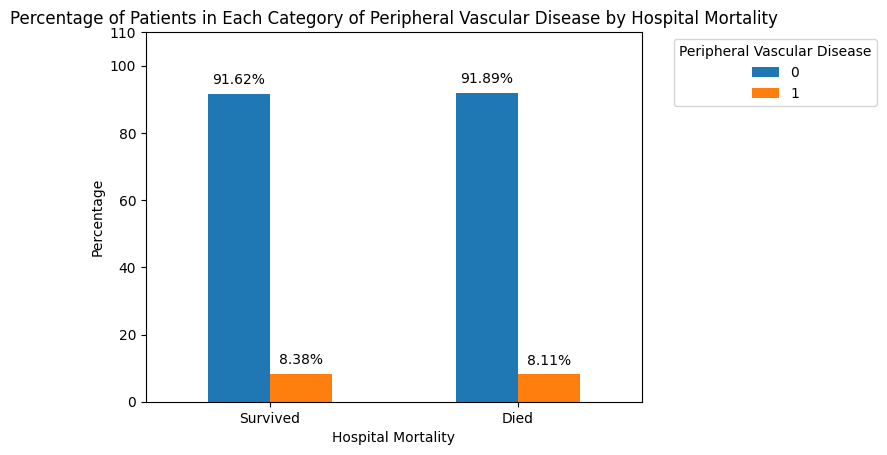

<Figure size 800x600 with 0 Axes>

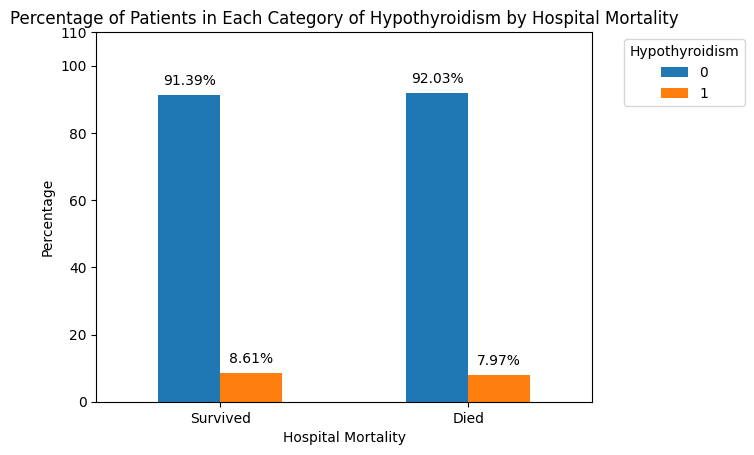

<Figure size 800x600 with 0 Axes>

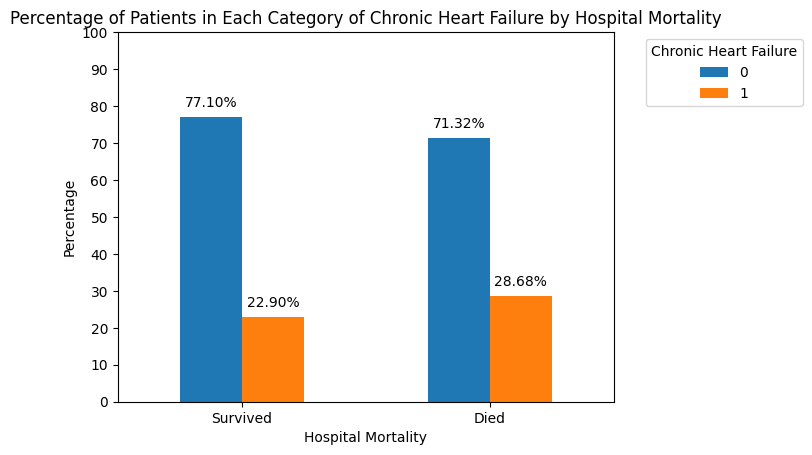

<Figure size 800x600 with 0 Axes>

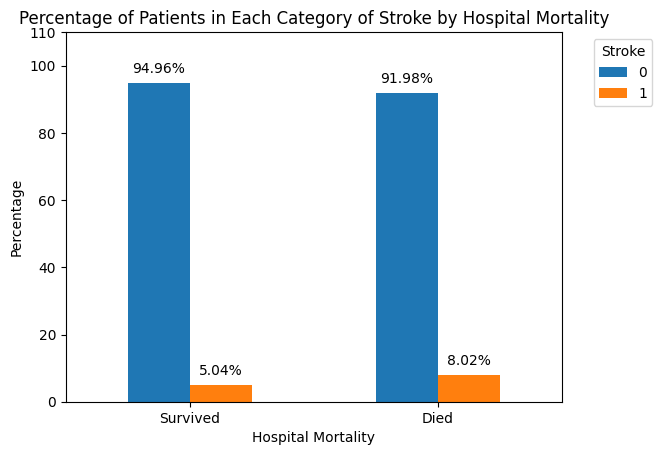

<Figure size 800x600 with 0 Axes>

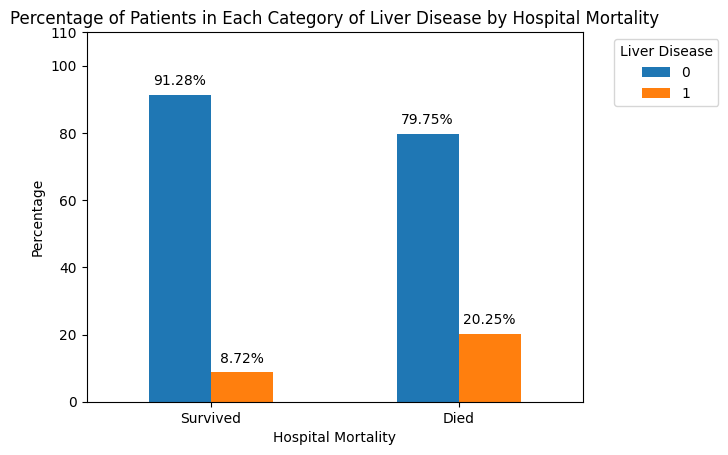

<Figure size 800x600 with 0 Axes>

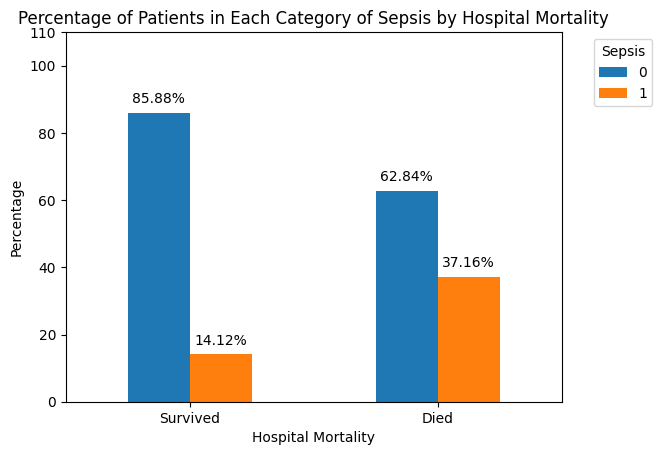

<Figure size 800x600 with 0 Axes>

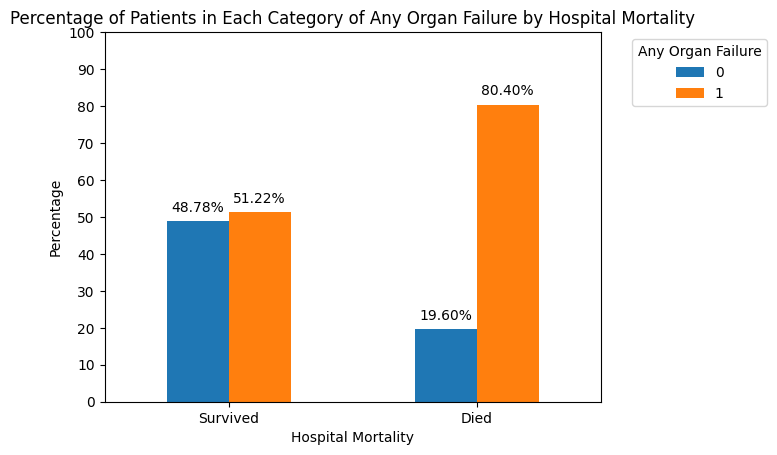

<Figure size 800x600 with 0 Axes>

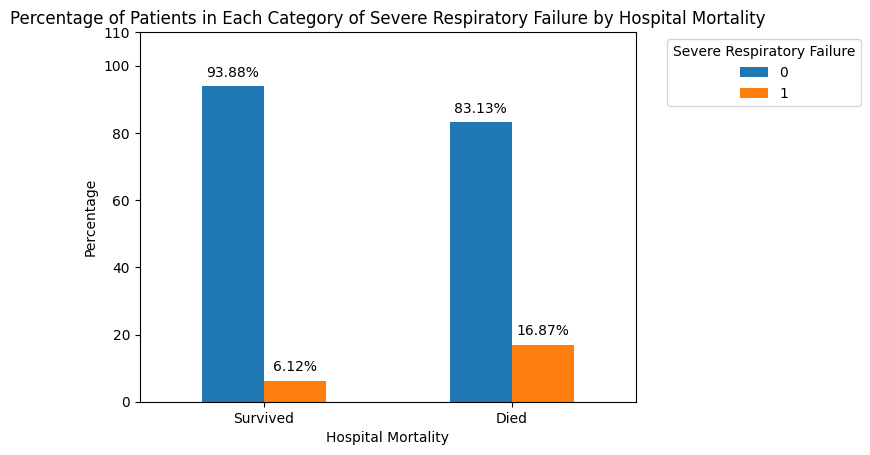

<Figure size 800x600 with 0 Axes>

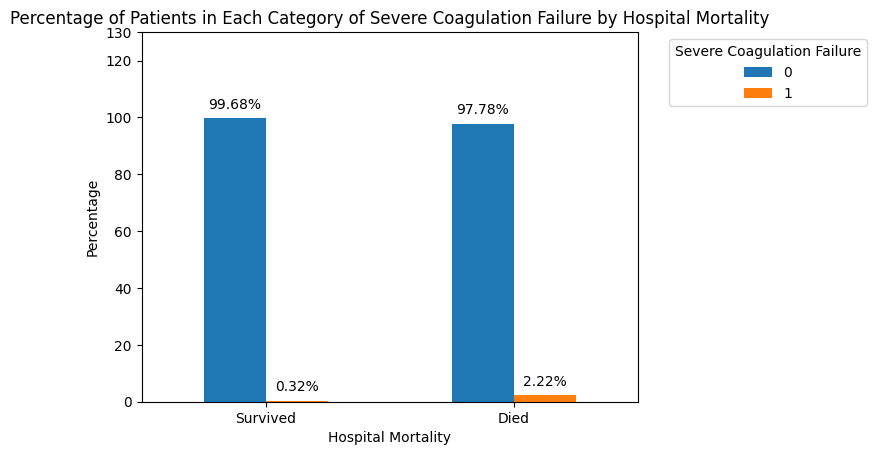

<Figure size 800x600 with 0 Axes>

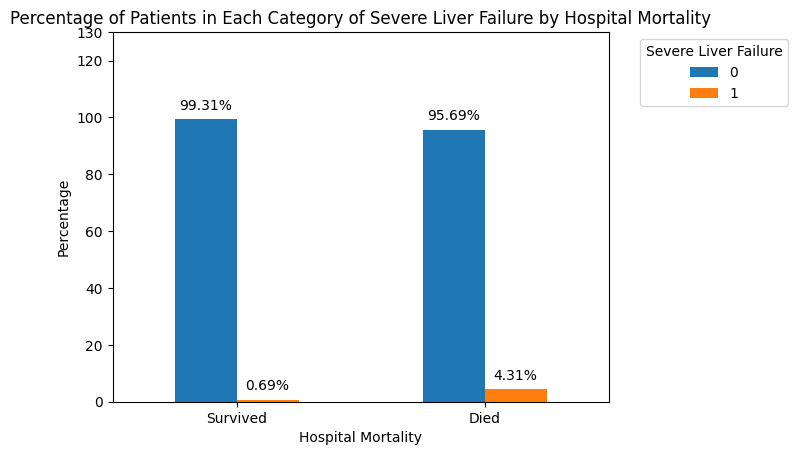

<Figure size 800x600 with 0 Axes>

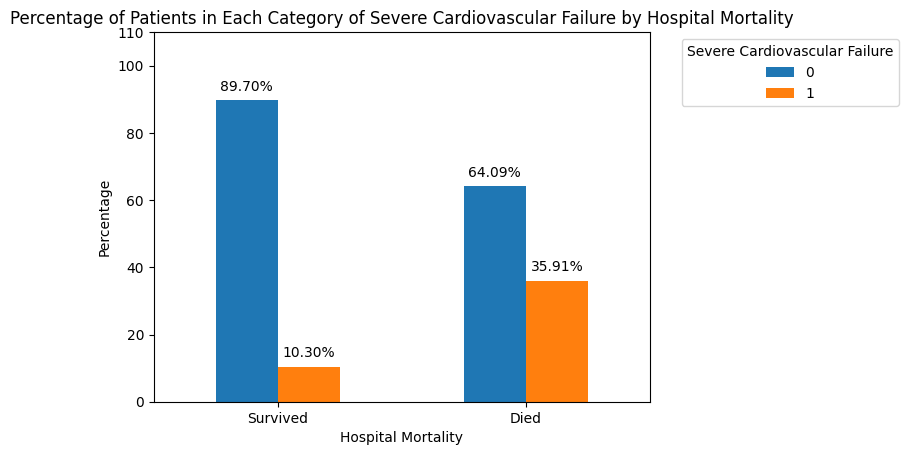

<Figure size 800x600 with 0 Axes>

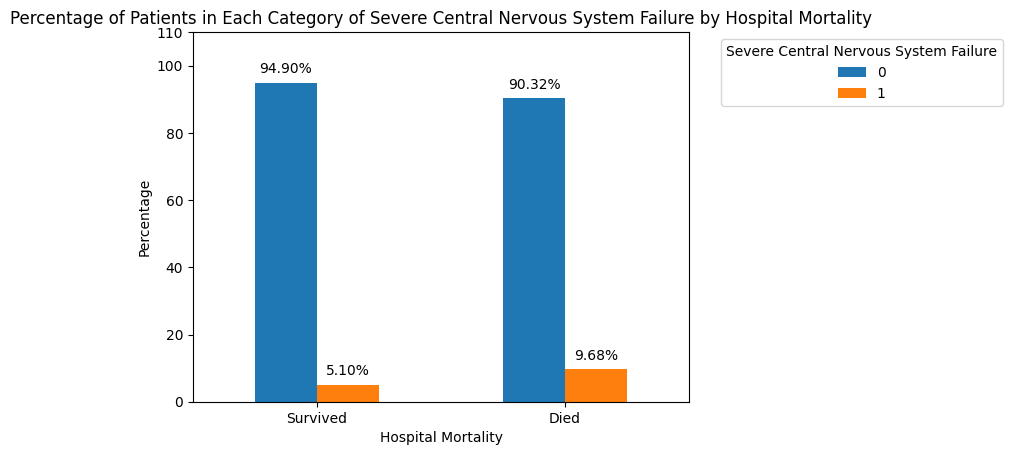

<Figure size 800x600 with 0 Axes>

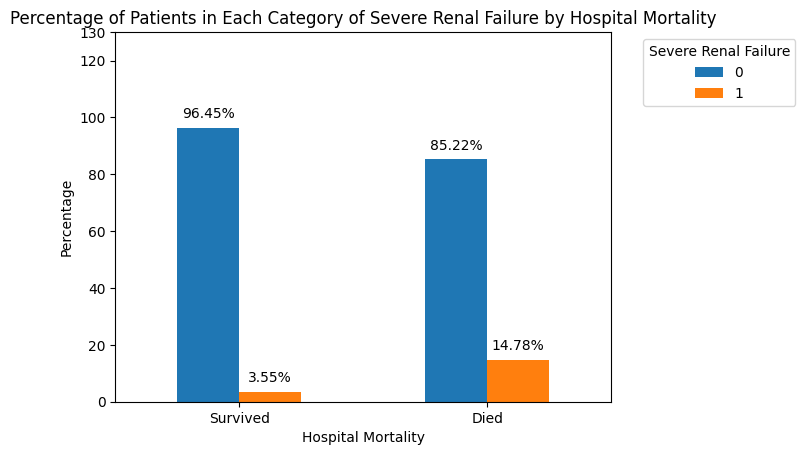

<Figure size 800x600 with 0 Axes>

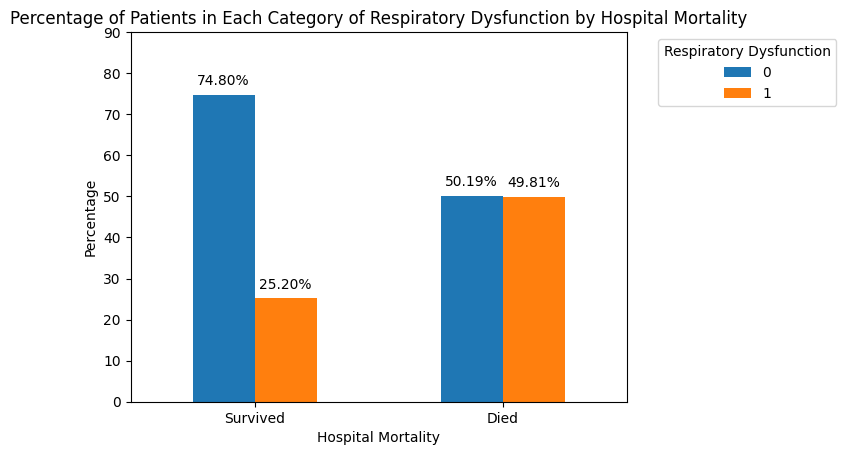

<Figure size 800x600 with 0 Axes>

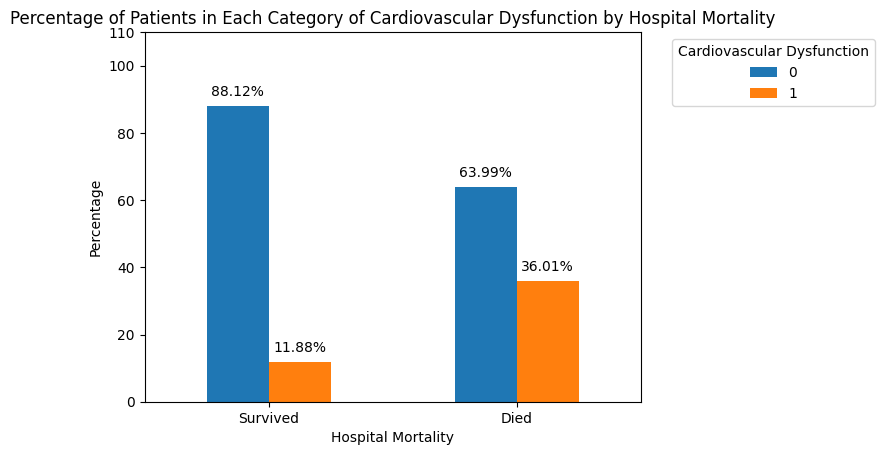

<Figure size 800x600 with 0 Axes>

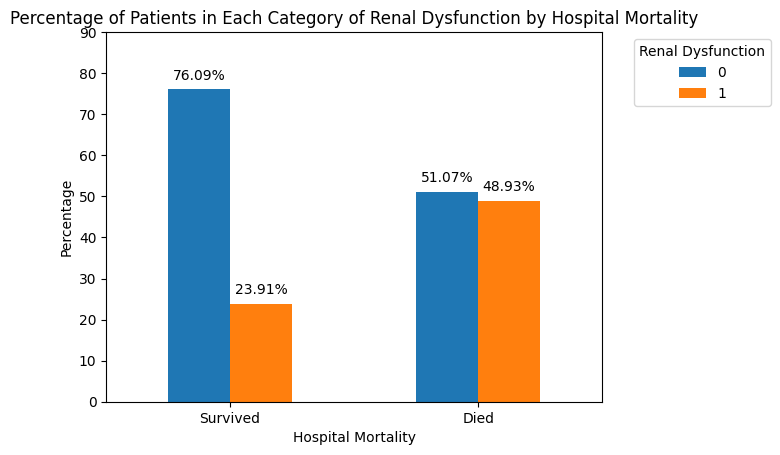

<Figure size 800x600 with 0 Axes>

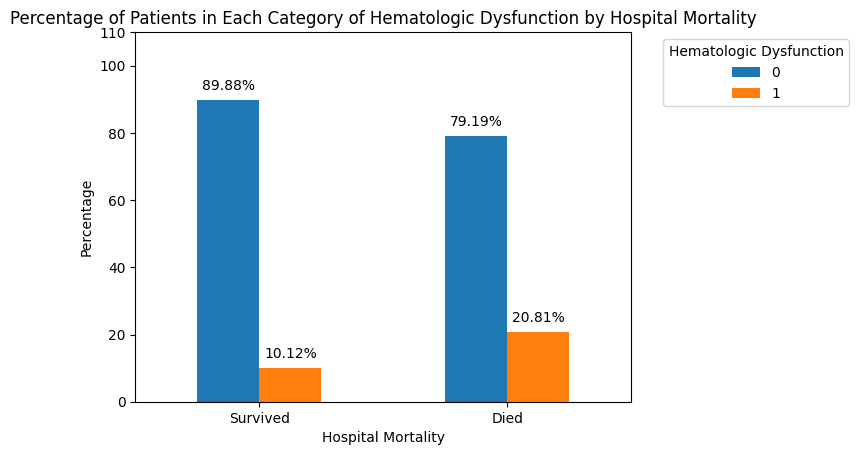

<Figure size 800x600 with 0 Axes>

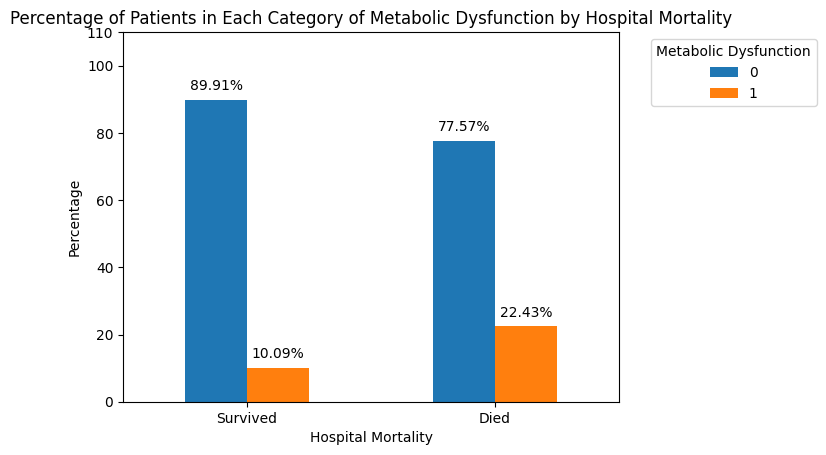

<Figure size 800x600 with 0 Axes>

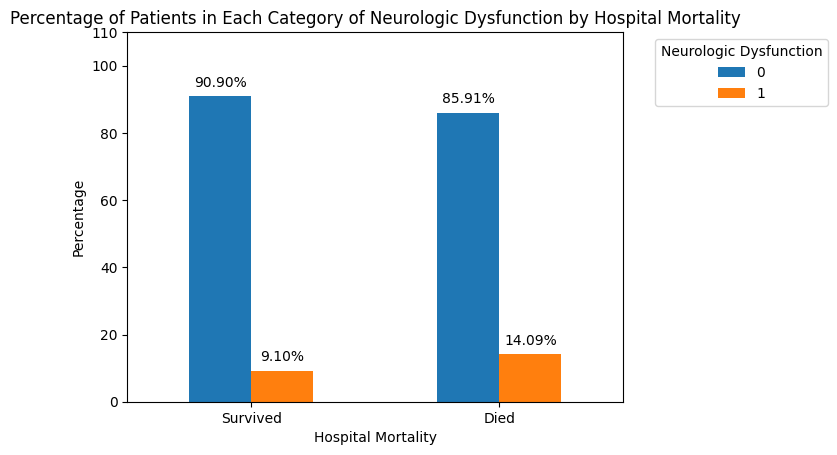

In [353]:
import matplotlib.pyplot as plt

# Set a consistent figure size for all plots
fig_size = (8, 6)

for column in binary_df.columns[1:]:
    # Calculate the percentage of patients in each category for each group
    percentages = binary_df.groupby('Hospital Mortality')[column].value_counts(normalize=True) * 100

    # Bar graph
    plt.figure(figsize=fig_size)  # Set the figure size
    ax = percentages.unstack().plot(kind='bar')

    # Add percentage labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Percentage of Patients in Each Category of {column} by Hospital Mortality')
    plt.xlabel('Hospital Mortality')
    plt.ylabel('Percentage')
    plt.xticks(ticks=[0, 1], labels=['Survived', 'Died'], rotation=0)  # Set rotation to 0 for horizontal labels

    # legend outside the plot area
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add an extra tick
    plt.yticks(list(plt.yticks()[0]) + [plt.yticks()[0][-1] + 10])

    plt.show()


**Observation:**
In summary, these are the critical findings we can infer from the graphs:

- There are more males than females in both the non-survivor and survivor groups

- The following statistics relate to the non-survivor group:



80% have any organ failure

50% have respiratory dysfunction

49% have renal dysfunction.

37% have uncomplicated hypertension

37% have sepsis

36% have severe cardiovascular failure

36% have cardiovascular dysfunction

29% have chronic heart failure

25% have hematologic diseases

23% have metabolic dysfunction

21% have hematologic dysfunction

20% have liver disease

19% have uncomplicated diabetes

19% have malignancy

17% have severe respiratory failure
